In [3]:
import pandas as pd
import numpy as np
import geopandas as gp
import pysal as ps 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] =12, 8

# Load Data

In [2]:
localidades = gp.GeoDataFrame.from_file("data/ideca/Loca.shp")
localidades.shape

(20, 7)

In [3]:
localidades.head(3)

,LocAAdmini,LocArea,LocCodigo,LocNombre,SHAPE_Area,SHAPE_Leng,geometry
0,Acuerdo 117 de 2003,4.879543e+06,15,ANTONIO NARIÑO,0.000397,0.108973,"POLYGON ((-74.1307544629999 4.593353347000061,..."
1,Acuerdo 117 de 2003,9.910940e+06,06,TUNJUELITO,0.000807,0.210542,POLYGON ((-74.13776618399993 4.594885111000053...
2,Acuerdo 117 de 2003,1.383408e+07,18,RAFAEL URIBE URIBE,0.001126,0.174513,POLYGON ((-74.12803073399994 4.592539093000084...


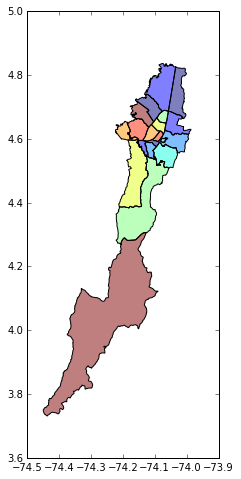

In [4]:
localidades.plot();

In [5]:
poi = gp.GeoDataFrame.from_file("data/ideca/sitios_interes.shp")
poi.shape

(2859, 10)

In [6]:
poi.head(3)

,geometry,gid,sincategor,sincodigo,sindirecci,sinnimport,sinnombre,sinpintern,sintactivi,sintelefon
0,POINT (-74.13933503299995 4.596032378000075),1,1,01020001,AC 45A SUR 51 96,2,Almacén Alkosto,www.alkosto.com,2,4073033
1,POINT (-74.05402317099993 4.711149522000085),2,1,01020002,AK 45 127C 13,3,Almacén Home Sentry,www.homesentry.net,2,7433333
2,POINT (-74.13682745499995 4.620127747000083),3,1,01020003,CL 3 SUR 71 65,3,Almacén Home Sentry,www.homesentry.net,2,7430001


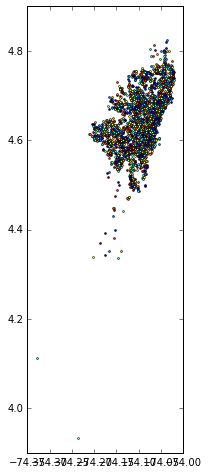

In [7]:
poi.plot()

In [8]:
categorias = pd.read_csv('data/ideca/clasificacion_sitios_interes.csv')
categorias.head(10)

,codigo,etiqueta
0,1,Establecimiento comercial
1,2,Transporte
2,3,Entretenimiento y recreacion
3,4,Salud
4,5,Religioso y cultural
5,6,Infraestructura
6,7,Educacion


# Data Enrichment

## Using attributes

In [9]:
poi_categoria = pd.merge(left=poi, right=categorias, how='left', 
                         left_on='sincategor', right_on='codigo')
poi_categoria.head(3)

,geometry,gid,sincategor,sincodigo,sindirecci,sinnimport,sinnombre,sinpintern,sintactivi,sintelefon,codigo,etiqueta
0,POINT (-74.13933503299995 4.596032378000075),1,1,01020001,AC 45A SUR 51 96,2,Almacén Alkosto,www.alkosto.com,2,4073033,1,Establecimiento comercial
1,POINT (-74.05402317099993 4.711149522000085),2,1,01020002,AK 45 127C 13,3,Almacén Home Sentry,www.homesentry.net,2,7433333,1,Establecimiento comercial
2,POINT (-74.13682745499995 4.620127747000083),3,1,01020003,CL 3 SUR 71 65,3,Almacén Home Sentry,www.homesentry.net,2,7430001,1,Establecimiento comercial


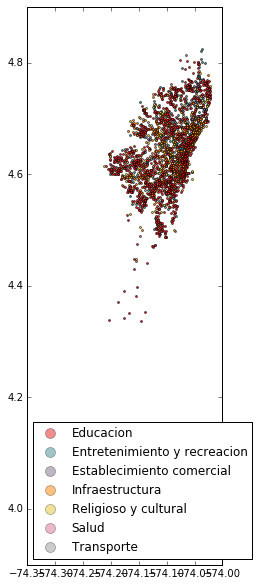

In [10]:
poi_categoria.plot(column='etiqueta', legend=True, figsize=(25, 10))

## Data enrichment Using Spatial Filter


In [11]:
poi_localidad = gp.sjoin(poi_categoria, localidades, how="inner", op='intersects')

poi_localidad.head()

,geometry,gid,sincategor,sincodigo,sindirecci,sinnimport,sinnombre,sinpintern,sintactivi,sintelefon,codigo,etiqueta,index_right,LocAAdmini,LocArea,LocCodigo,LocNombre,SHAPE_Area,SHAPE_Leng
0,POINT (-74.13933503299995 4.596032378000075),1,1,01020001,AC 45A SUR 51 96,2,Almacén Alkosto,www.alkosto.com,2,4073033,1,Establecimiento comercial,16,Acuerdo 8 de 1977,3.858973e+07,08,KENNEDY,0.003143,0.283582
2,POINT (-74.13682745499995 4.620127747000083),3,1,01020003,CL 3 SUR 71 65,3,Almacén Home Sentry,www.homesentry.net,2,7430001,1,Establecimiento comercial,16,Acuerdo 8 de 1977,3.858973e+07,08,KENNEDY,0.003143,0.283582
13,POINT (-74.12450472099994 4.630388792000076),14,1,01020014,AV AMERICAS 68A 94,3,Almacén Éxito,www.exito.com/,2,4191400,1,Establecimiento comercial,16,Acuerdo 8 de 1977,3.858973e+07,08,KENNEDY,0.003143,0.283582
14,POINT (-74.13334091099995 4.603785720000076),15,1,01020015,AK 68 37 39 S,2,Almacén Homecenter,www.homecenter.com.co,2,5940070,1,Establecimiento comercial,16,Acuerdo 8 de 1977,3.858973e+07,08,KENNEDY,0.003143,0.283582
22,POINT (-74.15423264599991 4.623578314000042),23,1,01020023,KR 78K 37A 53 S,2,Almacén Éxito,www.exito.com/,2,448 1150,1,Establecimiento comercial,16,Acuerdo 8 de 1977,3.858973e+07,08,KENNEDY,0.003143,0.283582


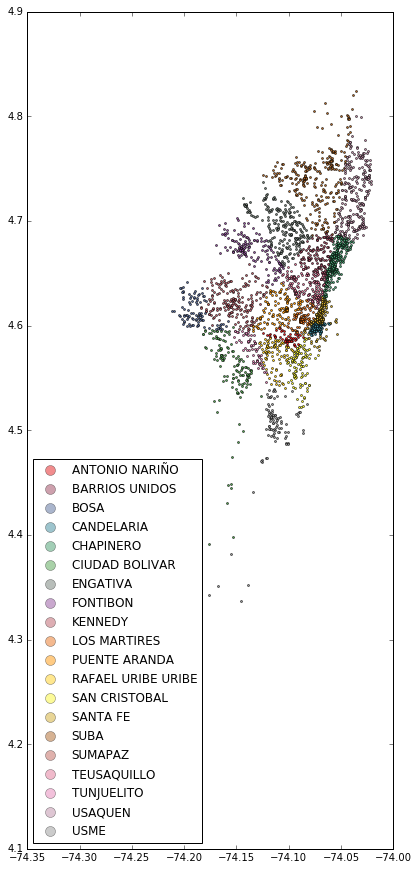

In [12]:
poi_localidad.plot(column='LocNombre', legend=True, figsize=(25, 15))

# Grouping and Counting

In [13]:
pd.set_option('display.max_rows', 500)
poi_localidad[['LocNombre', 'etiqueta', 'gid']].groupby(['LocNombre', 'etiqueta']).agg(['count'])

gid
                                                count
LocNombre          etiqueta                          
ANTONIO NARIÑO     Educacion                       18
                   Entretenimiento y recreacion     6
                   Establecimiento comercial       10
                   Infraestructura                  6
                   Religioso y cultural            11
                   Salud                            3
BARRIOS UNIDOS     Educacion                       34
                   Entretenimiento y recreacion    15
                   Establecimiento comercial       25
                   Infraestructura                 15
                   Religioso y cultural            22
                   Salud                            7
BOSA               Educacion                       51
                   Entretenimiento y recreacion     9
                   Establecimiento comercial        7
                   Infraestructura                 11
                   Religioso y cultural            10
                   Salud                            5
                   Transporte                       2
CANDELARIA         Educacion                       19
                   Entretenimiento y recreacion     7
                   Establecimiento comercial       28
                   Infraestructura                 18
                   Religioso y cultural            48
CHAPINERO          Educacion                       42
                   Entretenimiento y recreacion    15
                   Establecimiento comercial      117
                   Infraestructura                 76
                   Religioso y cultural            26
                   Salud                           15
CIUDAD BOLIVAR     Educacion                       77
                   Entretenimiento y recreacion    14
                   Establecimiento comercial        5
                   Infraestructura                 15
                   Religioso y cultural            18
                   Salud                            8
ENGATIVA           Educacion                       90
                   Entretenimiento y recreacion    12
                   Establecimiento comercial       35
                   Infraestructura                 29
                   Religioso y cultural            45
                   Salud                            9
                   Transporte                       1
FONTIBON           Educacion                       33
                   Entretenimiento y recreacion     7
                   Establecimiento comercial       41
                   Infraestructura                 43
                   Religioso y cultural            18
                   Salud                            3
                   Transporte                       4
KENNEDY            Educacion                       86
                   Entretenimiento y recreacion    11
                   Establecimiento comercial       27
                   Infraestructura                 24
                   Religioso y cultural            31
                   Salud                           10
                   Transporte                       1
LOS MARTIRES       Educacion                       16
                   Entretenimiento y recreacion     4
                   Establecimiento comercial       35
                   Infraestructura                 16
                   Religioso y cultural            12
                   Salud                            4
                   Transporte                       1
PUENTE ARANDA      Educacion                       35
                   Entretenimiento y recreacion     6
                   Establecimiento comercial       25
                   Infraestructura                 37
                   Religioso y cultural            17
                   Salud                            5
RAFAEL URIBE URIBE Educacion                       51
                   Entretenimiento y recreacion     9


# Filtering data using attributes

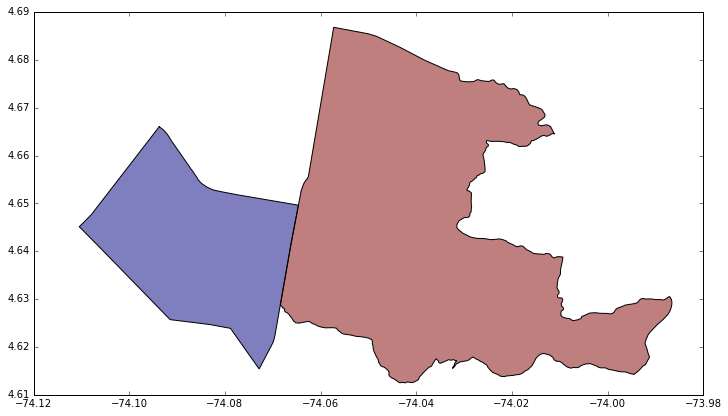

In [36]:
localidades_seleccionadas = localidades.loc[localidades['LocNombre'].isin(
        ['CHAPINERO','TEUSAQUILLO']  ) ]  
localidades_seleccionadas.plot()

In [37]:
localidades_seleccionadas.head()


,LocAAdmini,LocArea,LocCodigo,LocNombre,SHAPE_Area,SHAPE_Leng,geometry
5,Acuerdo 8 de 1977,1.419317e+07,13,TEUSAQUILLO,0.001156,0.148314,POLYGON ((-74.09371541699994 4.666065227000047...
10,Acuerdo 8 de 1977,3.800891e+07,02,CHAPINERO,0.003095,0.333966,POLYGON ((-74.01116193799993 4.664585312000042...


# filtering data using spatial filter

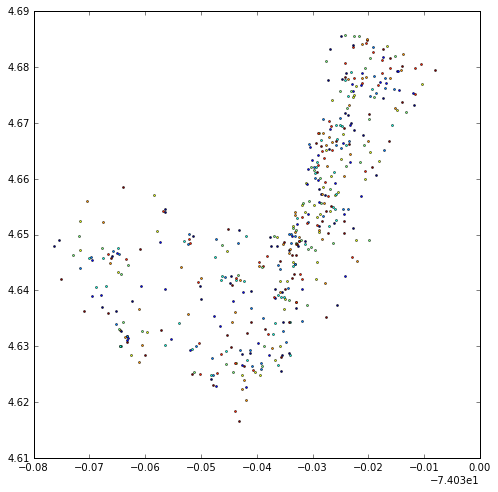

In [38]:
selected_poi = poi_categoria[poi_categoria.geometry.within(localidades_seleccionadas.unary_union)]
selected_poi.plot()

In [39]:
selected_poi.shape

(469, 12)

In [40]:
selected_poi.head(3)

,geometry,gid,sincategor,sincodigo,sindirecci,sinnimport,sinnombre,sinpintern,sintactivi,sintelefon,codigo,etiqueta
15,POINT (-74.06545010799994 4.63971669600005),16,1,01020016,CL 52 13 70,3,Almacén Éxito,www.exito.com/,2,212 4022,1,Establecimiento comercial
37,POINT (-74.08729990899991 4.64875543900007),38,1,01020038,KR 53 53 50,3,Supermercado Carulla,www.carulla.com,2,None,1,Establecimiento comercial
38,POINT (-74.07564591499994 4.642460516000085),39,1,01020039,CL 53 26 60,3,Supermercado Carulla,www.carulla.com,2,None,1,Establecimiento comercial


# Plot map using multiple layers 

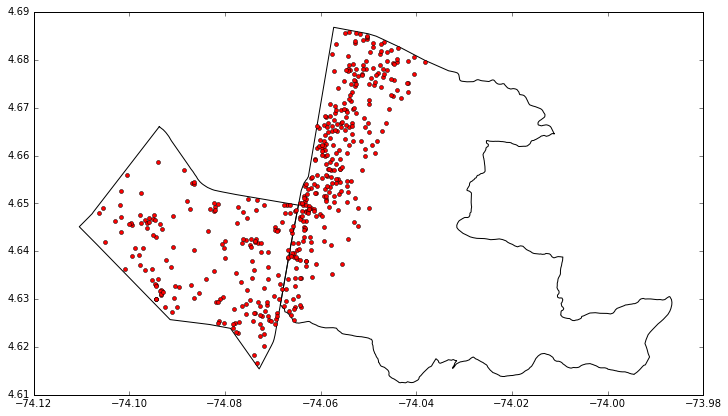

In [41]:
base = localidades_seleccionadas.plot(color='white')
selected_poi.plot(ax=base, marker='o', color='red', markersize=4);

# Save filtered data

In [42]:
selected_poi.to_file('data/shp/selected_poi.shp')

# Heatmap

In [43]:
# http://nbviewer.jupyter.org/gist/perrygeo/c426355e40037c452434
from scipy import ndimage
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

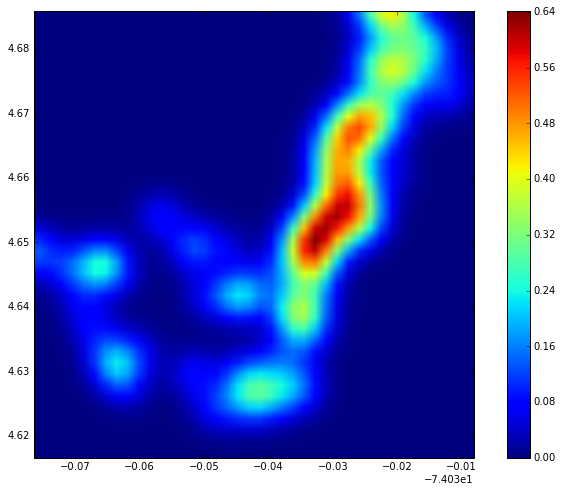

In [46]:
heatmap(selected_poi, bins=40, smoothing=1.5)

In [49]:
chapinero_establecimientos_comerciales  = selected_poi.loc[selected_poi['etiqueta'] ==
                                                           'Establecimiento comercial']
chapinero_establecimientos_comerciales.shape

(171, 12)

In [47]:
chapinero_establecimientos_comerciales.head(3)

,geometry,gid,sincategor,sincodigo,sindirecci,sinnimport,sinnombre,sinpintern,sintactivi,sintelefon,codigo,etiqueta
15,POINT (-74.06545010799994 4.63971669600005),16,1,01020016,CL 52 13 70,3,Almacén Éxito,www.exito.com/,2,212 4022,1,Establecimiento comercial
37,POINT (-74.08729990899991 4.64875543900007),38,1,01020038,KR 53 53 50,3,Supermercado Carulla,www.carulla.com,2,None,1,Establecimiento comercial
38,POINT (-74.07564591499994 4.642460516000085),39,1,01020039,CL 53 26 60,3,Supermercado Carulla,www.carulla.com,2,None,1,Establecimiento comercial


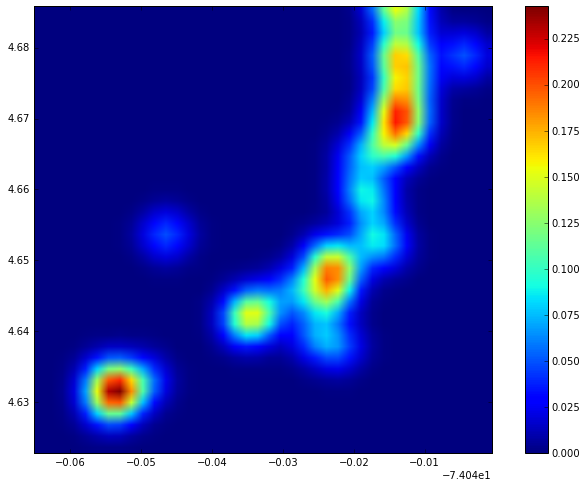

In [48]:
heatmap( chapinero_establecimientos_comerciales , bins=40, smoothing=1.5)